# OTA EDA :)

## Assumptions

From the first look at the description of the data, we assume that the prices were retrieved on Jan 22nd 2021 from an OTA (or multiple OTAs) by checking the offer for a one-night stay at a specific room for each specific date in the future. So these are only offers, none of the rooms were actually bought.

Additionally, for the sake of simplicity for this taks the code and visualizations will be "draft 1": we're not optimizing the code, since the dataset is not big, and not polishing the charts, leaving axes names default and titles simple. 

## Preparations

In [65]:
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import plotly.io as pio
# comment this line if you want default interactive chart rendering
pio.renderers.default = "png"

In [2]:
hotels_df = pd.read_csv("hotels_information.csv")

In [3]:
pricing_df = pd.read_csv("pricing_data.csv")

In [4]:
hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   our_hotel_id  282 non-null    int64  
 1   name          282 non-null    object 
 2   review_score  281 non-null    float64
 3   stars         267 non-null    float64
 4   latitude      282 non-null    float64
 5   longitude     282 non-null    float64
 6   room_count    272 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


The hotel data is mostly full, with some missing number of stars, scores and number of rooms.

Since we are here to explore, not build a model, we will not remove or impute any missing values, just note them.

In [5]:
hotels_df.describe(include='all')

,our_hotel_id,name,review_score,stars,latitude,longitude,room_count
count,2.820000e+02,282,281.000000,267.000000,282.000000,282.000000,272.000000
unique,NaN,282,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel Indigo Brussels - City,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN
mean,4.409062e+06,NaN,7.977580,3.584270,51.778623,4.681475,146.257353
std,2.672583e+06,NaN,1.719415,0.762993,0.734132,0.249236,120.406875
min,3.162060e+06,NaN,-1.000000,1.000000,50.793227,4.272877,7.000000
25%,3.162863e+06,NaN,7.900000,3.000000,50.850498,4.364813,52.000000
50%,3.169734e+06,NaN,8.300000,4.000000,52.333810,4.846411,111.000000
75%,3.688687e+06,NaN,8.700000,4.000000,52.365825,4.891380,207.500000


- Each hotel has a unique id and name.
- The review scores start from -1 (a missing value perhaps?)
- The star values range from 1 to 5.
- Latitude and longitude seem to have relatively small standard deviation / variance, which can suggest that the hotels are located not far from each other - maybe one country?
- The number of rooms has great variance, telling us that very small and very big hotels are represented in the dataset.


In [6]:
pricing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25380 entries, 0 to 25379
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   our_hotel_id         25380 non-null  int64  
 1   arrival_date         25380 non-null  object 
 2   lead_time            25380 non-null  int64  
 3   room_name            22756 non-null  object 
 4   meal_type_included   22756 non-null  object 
 5   max_persons          22756 non-null  float64
 6   price_value_ref      22597 non-null  float64
 7   price_value_non_ref  22756 non-null  float64
 8   is_sold_out          25380 non-null  bool   
dtypes: bool(1), float64(3), int64(2), object(3)
memory usage: 1.6+ MB


- Every pricing record has a hotel id, an arrival date, lead time and information on whether or not the hotel is sold out.
- Not every room name is known.
- Looks like where there is no room name, there is also no meal type known and no maximum number of people.
- Not every price is know, but there are more non-refundable offers than refundable (makes sense).

In [7]:
pricing_df.describe(include='all')

,our_hotel_id,arrival_date,lead_time,room_name,meal_type_included,max_persons,price_value_ref,price_value_non_ref,is_sold_out
count,2.538000e+04,25380,25380.00000,22756,22756,22756.000000,22597.000000,22756.000000,25380
unique,NaN,90,NaN,105,2,NaN,NaN,NaN,2
top,NaN,2021-01-23,NaN,Standard Double or Twin Room,NONE,NaN,NaN,NaN,False
freq,NaN,282,NaN,1704,20207,NaN,NaN,NaN,22756
mean,4.409062e+06,NaN,45.50000,NaN,NaN,2.003955,134.851263,116.835683,NaN
std,2.667893e+06,NaN,25.97967,NaN,NaN,0.062766,99.877643,87.140762,NaN
min,3.162060e+06,NaN,1.00000,NaN,NaN,2.000000,35.000000,8.000000,NaN
25%,3.162859e+06,NaN,23.00000,NaN,NaN,2.000000,85.000000,73.600000,NaN
50%,3.169734e+06,NaN,45.50000,NaN,NaN,2.000000,111.000000,96.000000,NaN
75%,3.691493e+06,NaN,68.00000,NaN,NaN,2.000000,152.000000,131.400000,NaN


- There are a lot of unique room names, which will probably make it hard to compare offers (not having a room category).
- The number of persons ranges from 2 to 3, where most of the rooms are for 2 people (the search criteria was probably for 2 people).
- Non-refundable offers start (and end) at lower prices than refundable, which makes sense.
- Most of the dates are not sold out. 

## Hotels Info

Let's look at this frame more closely.

In [8]:
hotels_df.head()

,our_hotel_id,name,review_score,stars,latitude,longitude,room_count
0,3169410,Hotel Indigo Brussels - City,8.4,4.0,50.855711,4.359679,283.0
1,3162064,Facade Hotel Amsterdam,7.6,2.0,52.374966,4.899320,30.0
2,8482738,Chasse Hotel,8.7,4.0,52.369583,4.861395,37.0
3,3169579,Hotel Le Châtelain,8.9,5.0,50.826103,4.363769,107.0
4,3922332,The Student Hotel Amsterdam City,8.7,4.0,52.354594,4.912632,200.0


Looking at the hotel names we can already see that we indeed have hotels located close geographically, for example, in Brussels and Amsterdam.

In [9]:
hotels_df.isnull().sum().sort_values(ascending=False)

stars           15
room_count      10
review_score     1
our_hotel_id     0
name             0
latitude         0
longitude        0
dtype: int64

Let's see the sample distributions of the numeric columns.

array([[<Axes: title={'center': 'our_hotel_id'}>,
        <Axes: title={'center': 'review_score'}>],
       [<Axes: title={'center': 'stars'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'room_count'}>]], dtype=object)

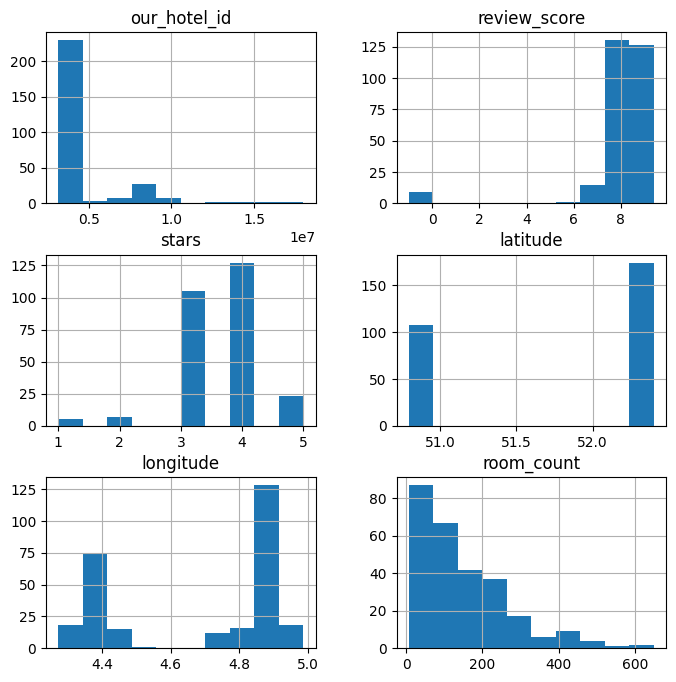

In [10]:
hotels_df.hist(figsize=(8, 8))

- The review scores are all > 6, except for some who are -1 -- probably missing values.
- Most of the hotels are 3- and 4-star hotels.
- For both lognitude and latitude, there are two notably different values, which points to two distinct regions. As we've seen hotels from Brussels and Amsterdam, they are two countries as minimum, and maybe even just the two capitals.
- Most hotels have less than 200-250 rooms, but some are very big. 

### Helper functions

To plot distributions for numerical columns and barplots for categorical ones.

In [11]:
def numeric_check(df, col):
    # check for null values
    print(f'Column: {col}')
    print(f'Null values: {df[col].isnull().sum()}')
    fig = px.box(df[col], width=500, title=f'{col} distribution')
    fig.show()

def categorical_check(df, col):
    # check for null values
    print(f'Column: {col}')
    print(f'Null values: {df[col].isnull().sum()}')
    fig = px.bar(df[col].value_counts(), width=500, title=f'{col} distribution')
    fig.show()


### Rooms distribution

First, we check for null or invalid values, then check the distribution.

Column: room_count
Null values: 10


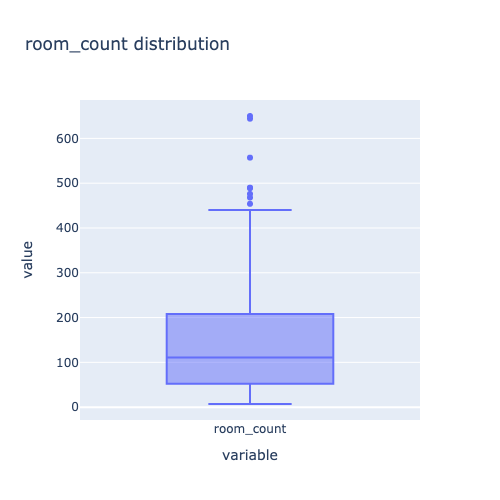

In [12]:
numeric_check(hotels_df, "room_count")

The majoity of the hotels have from 52 to 208 rooms. Let's look at the null values.

In [13]:
hotels_df[hotels_df['room_count'].isnull()]

,our_hotel_id,name,review_score,stars,latitude,longitude,room_count
22,16424438,Adagio Access Brussels Delta,8.2,3.0,50.818050,4.402559,NaN
50,12112537,Hotel Mai Amsterdam,8.7,4.0,52.375444,4.901446,NaN
67,9590761,Cityden Amsterdam West,8.5,4.0,52.376720,4.844635,NaN
69,8770352,Holiday Inn Express Amsterdam - City Hall,8.6,3.0,52.370508,4.908350,NaN
168,8864816,Postillion Hotel Amsterdam,8.6,4.0,52.333881,4.921240,NaN
176,17378898,INNSiDE by Meliá Amsterdam,NaN,NaN,52.339674,4.871608,NaN
191,16433964,Moxy Amsterdam Schiphol Airport,8.4,NaN,52.291123,4.726132,NaN
216,9035879,"Skotel Amsterdam, Hotelschool The Hague",9.1,3.0,52.369031,4.843876,NaN
234,14323546,TSH Amsterdam West,9.1,4.0,52.372246,4.836456,NaN
276,12176038,PREMIER SUITES PLUS Amsterdam,8.8,4.0,52.337532,4.868370,NaN


Interistingly, one of the hotels has nothing except for name and location -- INNSiDE in Amsterdam. We may need to gather the info for this hotel from other sources.

### Stars distribution

First, we check for null or invalid values, then check the distribution.

Let's see if the stars are actually integer values, not floats (i.e., there are no half-stars).


In [14]:
hotels_df['stars'].apply(float.is_integer).sum(), hotels_df['stars'].notnull().sum()

(267, 267)

So the column is integer after all. Let's check the null or invalid values.

In [15]:
hotels_df[(hotels_df['stars'].isnull()) | (hotels_df['stars'] < 1.0)]

,our_hotel_id,name,review_score,stars,latitude,longitude,room_count
28,3224920,Acostar Hotel,-1.0,NaN,52.365244,4.885768,30.0
40,3170500,Brussels Marriott Hotel Grand Place,-1.0,NaN,50.848711,4.348075,221.0
73,3169760,Holiday Inn Brussels Schuman,-1.0,NaN,50.840725,4.383821,62.0
100,4359518,CityHub Amsterdam,9.1,NaN,52.367343,4.867182,50.0
105,3169580,Hotel Novotel Brussels Off Grand Place,-1.0,NaN,50.846304,4.354979,140.0
146,8733715,MEININGER Hotel Amsterdam Amstel,8.2,NaN,52.346174,4.919216,185.0
161,3169520,NH Brussels Bloom,-1.0,NaN,50.855168,4.366521,305.0
176,17378898,INNSiDE by Meliá Amsterdam,NaN,NaN,52.339674,4.871608,NaN
182,3162240,Rokin Hotel,-1.0,NaN,52.370629,4.892961,38.0
191,16433964,Moxy Amsterdam Schiphol Airport,8.4,NaN,52.291123,4.726132,NaN


No weird values, just NaNs. Let's convert the column to categorical one so we can use it in further analysis properly.

In [16]:
hotels_df['stars'] = hotels_df['stars'].astype('Int64')
hotels_df['stars'].head()

0    4
1    2
2    4
3    5
4    4
Name: stars, dtype: Int64

In [17]:
hotels_df['stars'] = pd.Categorical(hotels_df['stars'], categories=[1,2,3,4,5], ordered=True)
hotels_df['stars']

0        4
1        2
2        4
3        5
4        4
      ... 
277      5
278    NaN
279      4
280      4
281      3
Name: stars, Length: 282, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

Column: stars
Null values: 15


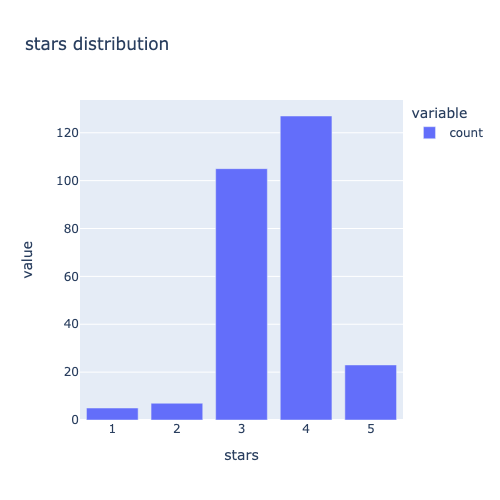

In [18]:
categorical_check(hotels_df, 'stars')

As we've said before, most of the hotels are 3- and 4-star.
The number of 5-star hotels can be relatively small due to the naturally lower number of 5-star hotels comparing to 3- and 4-star ones. This could be worth checking.

### Review score

First we check for null and weird values.

In [19]:
hotels_df[(hotels_df['review_score'].isnull()) | (hotels_df['review_score'] < 1.0)]

,our_hotel_id,name,review_score,stars,latitude,longitude,room_count
28,3224920,Acostar Hotel,-1.0,NaN,52.365244,4.885768,30.0
40,3170500,Brussels Marriott Hotel Grand Place,-1.0,NaN,50.848711,4.348075,221.0
73,3169760,Holiday Inn Brussels Schuman,-1.0,NaN,50.840725,4.383821,62.0
105,3169580,Hotel Novotel Brussels Off Grand Place,-1.0,NaN,50.846304,4.354979,140.0
161,3169520,NH Brussels Bloom,-1.0,NaN,50.855168,4.366521,305.0
176,17378898,INNSiDE by Meliá Amsterdam,NaN,NaN,52.339674,4.871608,NaN
182,3162240,Rokin Hotel,-1.0,NaN,52.370629,4.892961,38.0
203,3162060,Hotel Asterisk 3 star superior,-1.0,NaN,52.358835,4.893867,40.0
208,17975980,Holiday Inn Express - Brussels - Grand-Place,-1.0,NaN,50.851797,4.350214,117.0
278,3169400,Thon Hotel Bristol Stephanie,-1.0,NaN,50.831528,4.358980,142.0


We have one NaN, no zeroes and some invalid values (-1). We kep that in mind but won't "fix" anything yet, becuase we are just exploring. Besides, those -1 values could also mean something.

In the next chart we just take the valid scores.

Column: review_score
Null values: 0


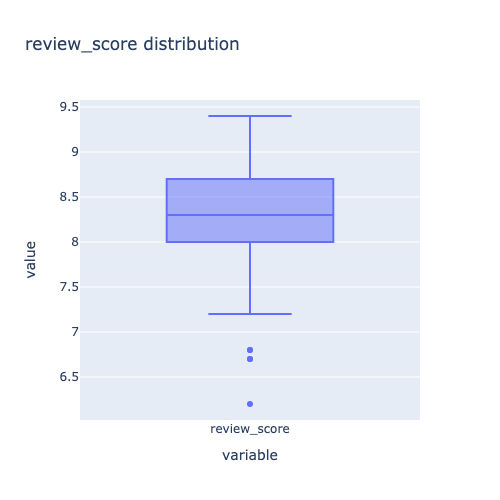

In [20]:
numeric_check(hotels_df[hotels_df['review_score'] > 0.0],'review_score')

Most of the hotels have pretty good scores, and hover over 8.

### Geographical location of hotels

First we plot a simple scatter to see the density of the hotels' coordinates.

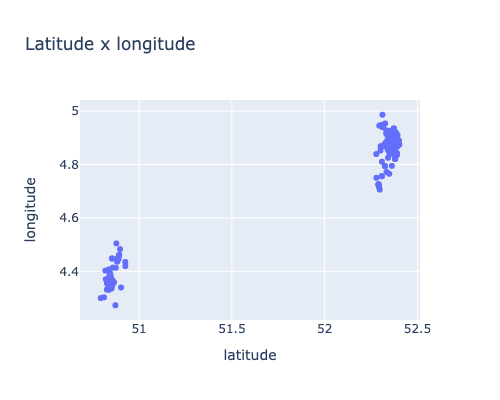

In [21]:
fig = px.scatter(hotels_df, x='latitude', y='longitude', width=500, height=400, title='Latitude x longitude')
fig.show()

Indeed, two distinct locations, two countries at least.

Now let's try to put it on a simple map. Judging by the names of the hotels we'll focus on Europe.

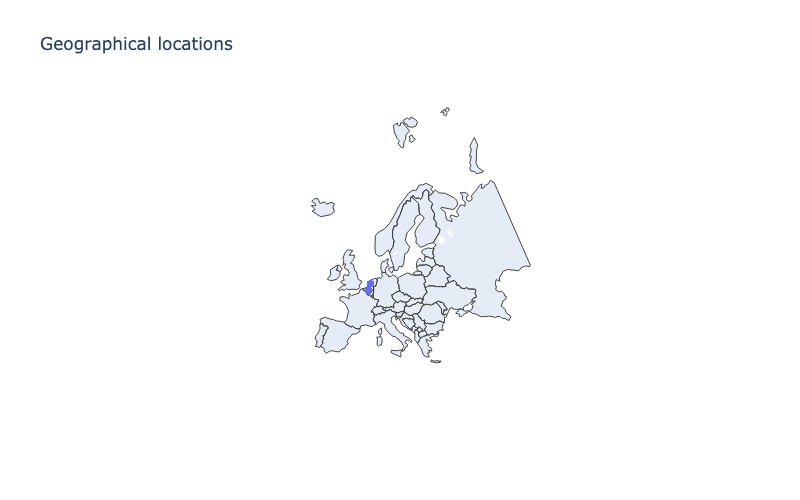

In [22]:
# let's try that on the map
fig = px.scatter_geo(hotels_df, lat='latitude', lon='longitude', width=800, height=500, scope='europe', title='Geographical locations')
fig.show()

If we zoom in on the blue dots, we can clearly see two groups on the map now - the hotels in Belgium and The Netherlands. We can probably be more precise and say they are in Brussels and Amsterdam, but just by looking we can't know 100%.

Let's check the countries using geopandas ans spatial join.

** Not sure how effective the spatial join would be if we had a bigger set, but for this example it works fast.

In [23]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf = gpd.GeoDataFrame(hotels_df, geometry=gpd.points_from_xy(hotels_df['longitude'], hotels_df['latitude']))
result = gpd.sjoin(gdf, world, how='left')
# we had two name columns, let's rename them
result.rename({'name_left':'name', 'name_right': 'country'}, axis=1, inplace=True)
# we only need the country column
hotels_df_with_country = result[list(hotels_df.columns) + ['country']]
hotels_df_with_country.head()

,our_hotel_id,name,review_score,stars,latitude,longitude,room_count,country
0,3169410,Hotel Indigo Brussels - City,8.4,4,50.855711,4.359679,283.0,Belgium
1,3162064,Facade Hotel Amsterdam,7.6,2,52.374966,4.899320,30.0,Netherlands
2,8482738,Chasse Hotel,8.7,4,52.369583,4.861395,37.0,Netherlands
3,3169579,Hotel Le Châtelain,8.9,5,50.826103,4.363769,107.0,Belgium
4,3922332,The Student Hotel Amsterdam City,8.7,4,52.354594,4.912632,200.0,Netherlands


Verify that everything is okay after merge.

In [24]:
len(hotels_df_with_country), len(hotels_df_with_country['our_hotel_id'].unique()), hotels_df_with_country['country'].isnull().sum()

(282, 282, 0)

All hotels were merged, no record was merged to more than one country, all countries were set.

Now let's look at the hotels by country.

Column: country
Null values: 0


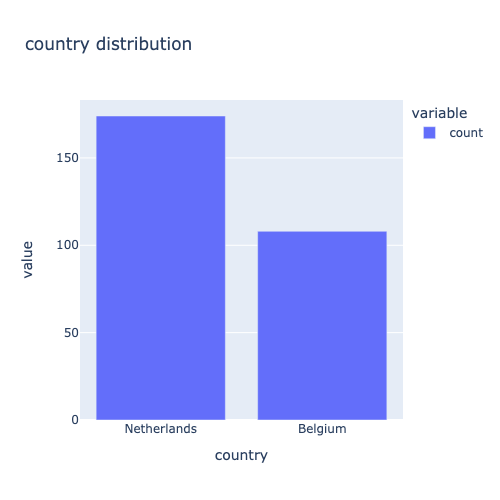

In [25]:
categorical_check(hotels_df_with_country, 'country')

Majority of the hotels are located in The Netherlands. We only have The Netherlands and Belgium hotels in this dataset. 

**Again, we could just say Brussels and Amsterdam by looking at the map and guessing, but we cannot know that 100%, it could be Burssels and surroundings, Amsterdam and surroundings. We will settle on Belgium and The Netherlands.** 

### Room count by country

Now let's look at the distributions of hotels characteristics by country.

Starting with a new set of helper functions.

In [26]:
# setting the color map so Belgium and The Netherlands always have the same colors.
c = dict(zip(hotels_df_with_country['country'].unique(), px.colors.qualitative.G10))

def numeric_check_grouped(df, col, group_col):
    # check for null values
    print(f'Column: {col}')
    print(f'Null values: {df[col].isnull().sum()}')
    fig = px.box(df, x=col, color=group_col, color_discrete_map=c, width=700, title=f'{col} by {group_col}')
    fig.show()

def categorical_check_grouped(df, col, group_col):
    # check for null values
    print(f'Column: {col}')
    print(f'Null values: {df[col].isnull().sum()}')
    df_grouped = df.groupby([group_col, col]).agg({'our_hotel_id': 'count'}).reset_index()
    fig = px.bar(df_grouped, x=col, y='our_hotel_id', color=group_col, color_discrete_map=c, barmode='group', width=700, title=f'{col} by {group_col}')
    fig.show()

Column: room_count
Null values: 10


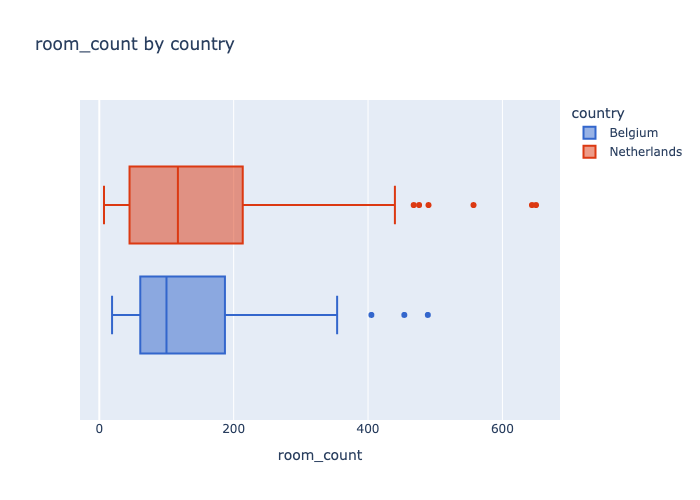

In [27]:
numeric_check_grouped(hotels_df_with_country, 'room_count', 'country')

The hotels in The Netherlands have bigger variance in the number of rooms. Could be due to the larger number of tourists in The Netherlands (Amsterdam in particular), bur also could be just the sample.

### Stars by country

Column: stars
Null values: 15


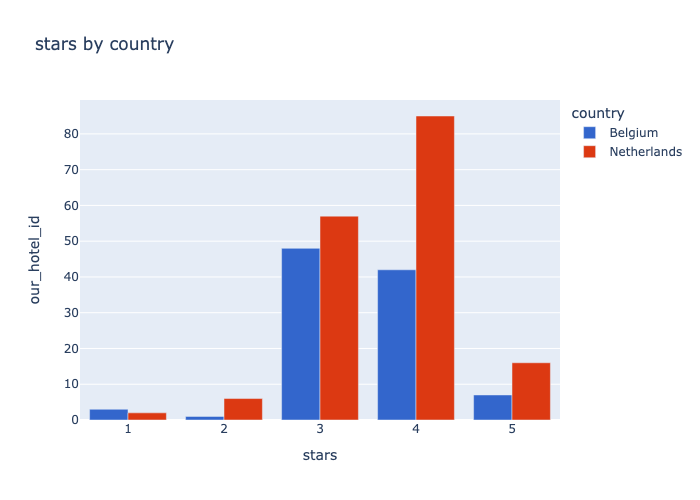

In [28]:
categorical_check_grouped(hotels_df_with_country, 'stars', 'country')

The Netherlands in general has more hotels, but it also has way more 4-star hotels, while Belgium has slightly more 3-star hotels than 4-star. We have very little data on 5-star hotels, and only a few hotels with 1 and 2 stars, so we shal take those results carefully.

### Review scores by country

Column: review_score
Null values: 0


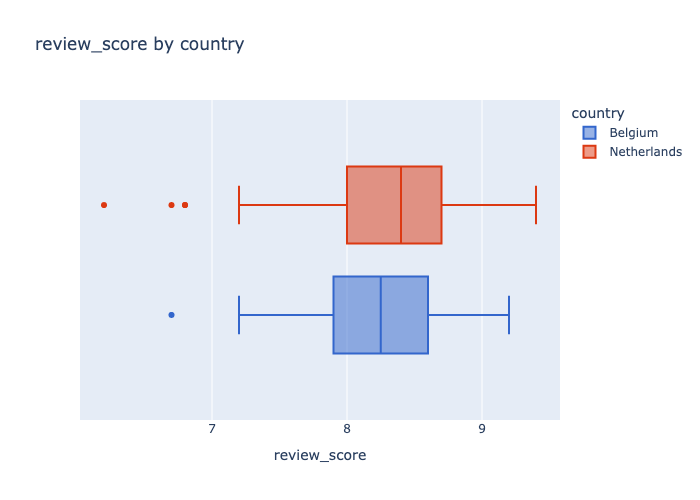

In [29]:
numeric_check_grouped(hotels_df_with_country[hotels_df_with_country['review_score'] > 0.0], 'review_score', 'country')

Not only The Netherlands has more 4-star hotels, but the review scores for the hotels in The Netherlands is generally higher. However, The Netherlands also has quite a low outlier with a score of 6.2 (we should probably avoid this one when planning our trip :)

The higher scores for the Netherlands could just be because of the large amount of 4-star hotels there. 
Which brings us to the next task.

### 2.2.3. What are the distributions of hotels when it comes to stars and review scores?

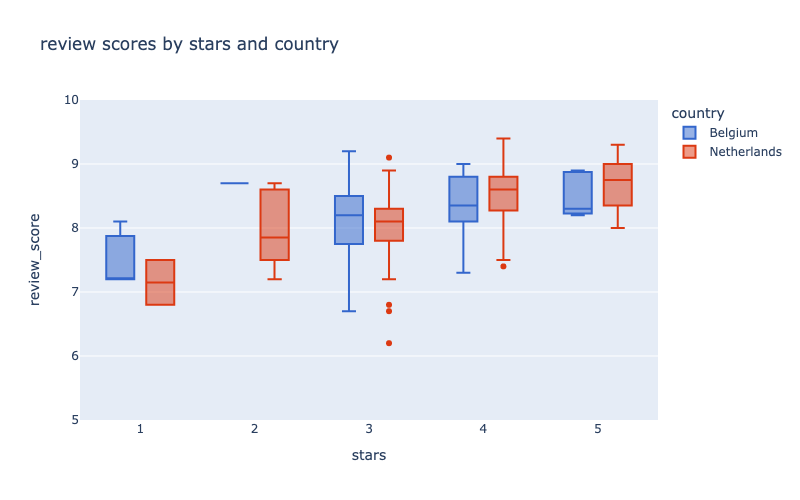

In [30]:
fig = px.box(hotels_df_with_country, x='stars', y='review_score', color='country', color_discrete_map=c, width=800, title=f'review scores by stars and country')
# we don't want to see -1 scores
fig.update_yaxes(range = [5,10])
fig.show()

We can see the general pattern - the bigger the star count the better the scores. 

The scores for 3- and 4-star hotels in Belgium have greater variance than those in The Netherlands. the most volatile seem to be the scores of 3-star hotels, maybe due to the fact that the quality standards and expectations for 3-star hotels are not clear?

### Room count by stars

Is there any correlation?

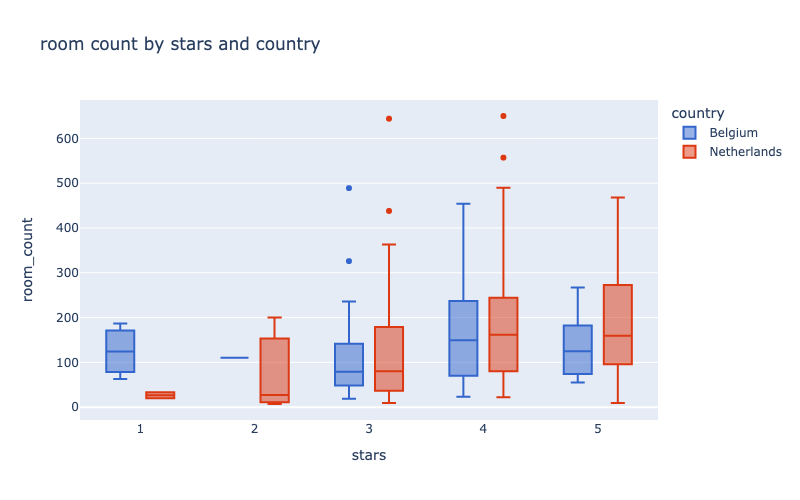

In [31]:
fig = px.box(hotels_df_with_country, x='stars', y='room_count', color='country', color_discrete_map=c, width=800, title=f'room count by stars and country')
fig.show()

In general, it seems that the 4- and 5-star hotels tend to be on the bigger side, and 3-star hotels have normally les than 200 rooms.

## Adding Pricing Info

Let's merge the hotels with the pricing info.

But first, check the columns distribution in case we can see something interesting.

array([[<Axes: title={'center': 'our_hotel_id'}>,
        <Axes: title={'center': 'lead_time'}>],
       [<Axes: title={'center': 'max_persons'}>,
        <Axes: title={'center': 'price_value_ref'}>],
       [<Axes: title={'center': 'price_value_non_ref'}>, <Axes: >]],
      dtype=object)

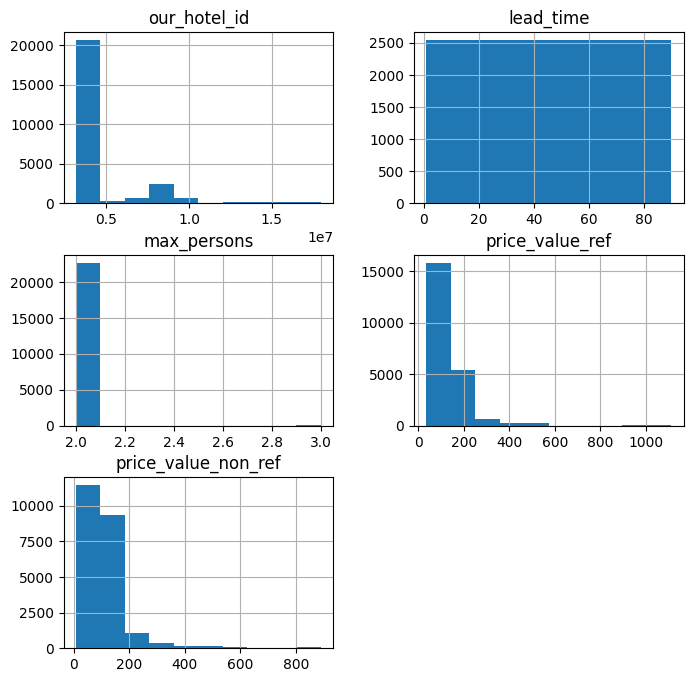

In [32]:
pricing_df.hist(figsize=(8, 8))

We can see that most offers come under 200-300 euros. Obviously, refundable offers would start and end at higher prices than non-refundable.

In [33]:
hotels_df_with_pricing = pricing_df.merge(hotels_df_with_country, how='left', on='our_hotel_id')
hotels_df_with_pricing['name'].isnull().sum()

0

Every record from the pricing data matched to a recond in the hotels data.

Let's see how the data looks.

In [34]:
hotels_df_with_pricing.head(10)

,our_hotel_id,arrival_date,lead_time,room_name,meal_type_included,max_persons,price_value_ref,price_value_non_ref,is_sold_out,name,review_score,stars,latitude,longitude,room_count,country
0,12112537,2021-01-23,1,Small Double Room,NONE,2.0,65.0,58.5,False,Hotel Mai Amsterdam,8.7,4,52.375444,4.901446,NaN,Netherlands
1,12112537,2021-01-24,2,Small Double Room,NONE,2.0,65.0,58.5,False,Hotel Mai Amsterdam,8.7,4,52.375444,4.901446,NaN,Netherlands
2,12112537,2021-01-25,3,Small Double Room,NONE,2.0,65.0,58.5,False,Hotel Mai Amsterdam,8.7,4,52.375444,4.901446,NaN,Netherlands
3,12112537,2021-01-26,4,Small Double Room,NONE,2.0,65.0,58.5,False,Hotel Mai Amsterdam,8.7,4,52.375444,4.901446,NaN,Netherlands
4,12112537,2021-01-27,5,Small Double Room,NONE,2.0,65.0,58.5,False,Hotel Mai Amsterdam,8.7,4,52.375444,4.901446,NaN,Netherlands
5,12112537,2021-01-28,6,Small Double Room,NONE,2.0,65.0,58.5,False,Hotel Mai Amsterdam,8.7,4,52.375444,4.901446,NaN,Netherlands
6,12112537,2021-01-29,7,Small Double Room,NONE,2.0,75.0,67.5,False,Hotel Mai Amsterdam,8.7,4,52.375444,4.901446,NaN,Netherlands
7,12112537,2021-01-30,8,Small Double Room,NONE,2.0,75.0,67.5,False,Hotel Mai Amsterdam,8.7,4,52.375444,4.901446,NaN,Netherlands
8,12112537,2021-01-31,9,Small Double Room,NONE,2.0,65.0,58.5,False,Hotel Mai Amsterdam,8.7,4,52.375444,4.901446,NaN,Netherlands
9,12112537,2021-02-01,10,Small Double Room,NONE,2.0,65.0,58.5,False,Hotel Mai Amsterdam,8.7,4,52.375444,4.901446,NaN,Netherlands


### 2.2.1. How many hotels are available per arrival day in the next 90 days?

For the hotels that are **not sold out** on a given date. Group by arrival day, count the hotels.

In [35]:
hotels_df_with_pricing['arrival_date'] = pd.to_datetime(hotels_df_with_pricing['arrival_date'])

In [36]:
hotels_df_with_pricing_grouped = hotels_df_with_pricing[~hotels_df_with_pricing['is_sold_out']].groupby(['country', 'arrival_date']).agg({'our_hotel_id': 'count'}).reset_index().rename(columns= {'our_hotel_id':'count'})


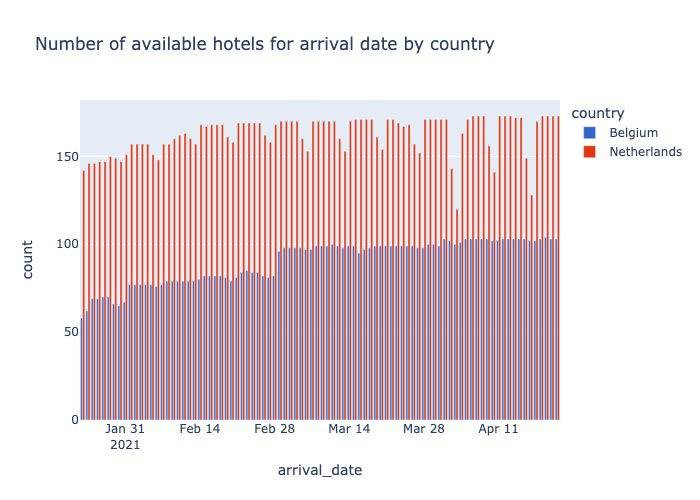

In [37]:
fig = px.bar(hotels_df_with_pricing_grouped, x='arrival_date', y='count', color='country', color_discrete_map=c, barmode='group', title='Number of available hotels for arrival date by country')
fig.show()

As can be predicted, the shorter the lead time the less hotels are available for both countries. The periodical dips for the Netherlands look like busy weekends, which we will verfy later. The dips are more prominent in The Netherlands than in Belgium.

Since it's hard to see the actual amounts let's show the same info but in percentages from total number of avalable hotels. 

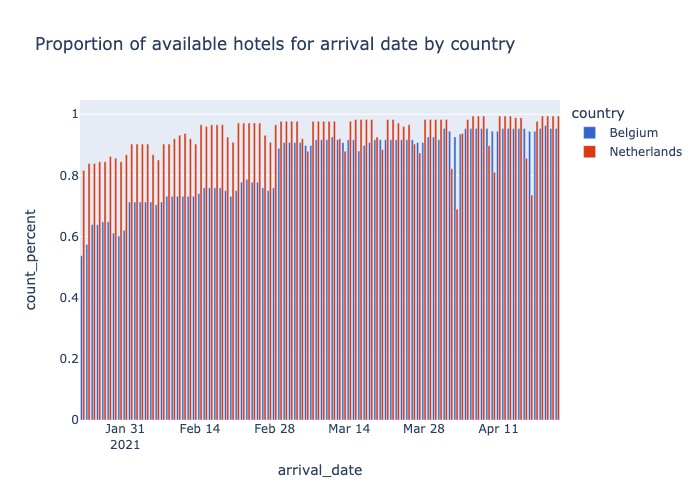

In [38]:
len_netherlands = len(hotels_df_with_country[hotels_df_with_country['country'] == 'Netherlands'])
len_belgium = len(hotels_df_with_country[hotels_df_with_country['country'] == 'Belgium'])
hotels_df_with_pricing_grouped['count_percent'] = hotels_df_with_pricing_grouped.apply(lambda x: x['count']/len_netherlands if x['country'] == 'Netherlands' else x['count']/len_belgium, axis=1)

fig = px.bar(hotels_df_with_pricing_grouped, x='arrival_date', y='count_percent', color='country', color_discrete_map=c, barmode='group', title='Proportion of available hotels for arrival date by country')
fig.show()

Looks like the hotels in Belgium generally have a higher occupancy / lower availability.

### Available hotels per day-of-week

Since we only have 90 days of data, we can't track seasonal patterns, so let's look at days of the week.

First, we add the column. The values will be from 0 (Monday) to 6 (Sunday). We could also replace the numbers with names, but it's not critical as the numbers are clear enough.

In [39]:
hotels_df_with_pricing['day_of_week'] = hotels_df_with_pricing['arrival_date'].dt.day_of_week
hotels_df_with_pricing['day_of_week'].head()

0    5
1    6
2    0
3    1
4    2
Name: day_of_week, dtype: int32

Now, let's look at the distribution graph of the number of available hotels by day of the week.

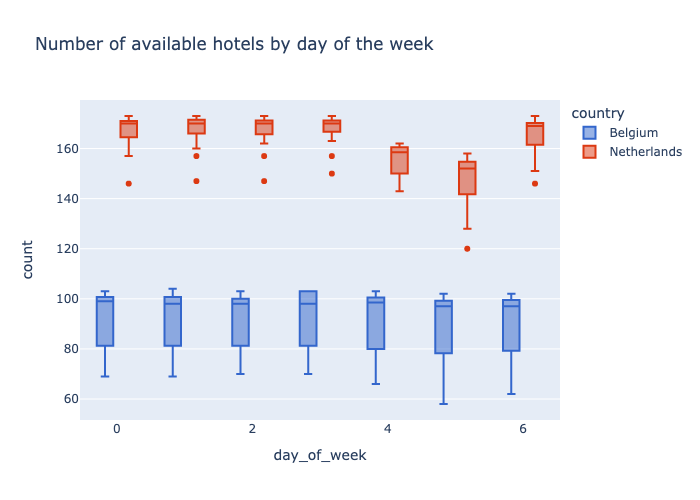

In [40]:
hotels_df_with_pricing_grouped = hotels_df_with_pricing[~hotels_df_with_pricing['is_sold_out']].groupby(['day_of_week','country', 'arrival_date']).agg({'our_hotel_id': 'count'}).reset_index().rename(columns= {'our_hotel_id':'count'})

fig = px.box(hotels_df_with_pricing_grouped, x='day_of_week', y='count', color='country', color_discrete_map=c, title='Number of available hotels by day of the week')
fig.show()

Here it's clearer that for Belgium, the available hotels are more evenly distributed throughout the week than in The Netherlands, where there is a dip on the weekend (Friday-4 and Saturday-5). Amsterdam is a big touristic hub, probably bigger than Brussels, which can be one reason for such dip.

### 2.2.2. What are the overall pricing patterns?

Do we have any null pricing values?

In [41]:
hotels_df_with_pricing[['price_value_ref', 'price_value_non_ref']].isnull().sum()

price_value_ref        2783
price_value_non_ref    2624
dtype: int64

Could the price be null because the hotel is sold out?

In [42]:
hotels_df_with_pricing[hotels_df_with_pricing['price_value_non_ref'].isnull()]['is_sold_out'].value_counts()


is_sold_out
True    2624
Name: count, dtype: int64

In [43]:
hotels_df_with_pricing[hotels_df_with_pricing['price_value_ref'].isnull()]['is_sold_out'].value_counts()


is_sold_out
True     2624
False     159
Name: count, dtype: int64

In [44]:
hotels_df_with_pricing[(hotels_df_with_pricing['price_value_ref'].isnull()) & (hotels_df_with_pricing['price_value_non_ref'].notnull())]['lead_time'].value_counts()


lead_time
3    37
2    34
1    33
4    29
5    16
6    10
Name: count, dtype: int64

Most of the missing prices are the sold out rooms, but for some hotels, there are only non-refunlable room prices available, refundable offers missing for them.

For the sold out hotels, missing prices make sense. For the others, prices become non-refundalble when lead time is too small.

Now, let's look at prices distribution by country for both refundable and non-refundable price.

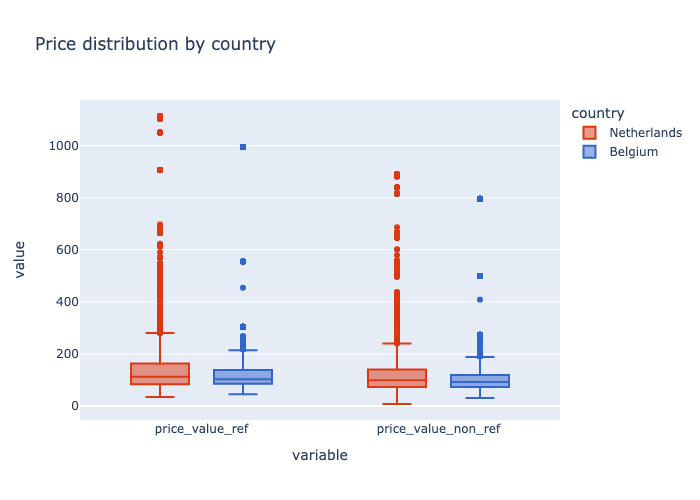

In [45]:
fig = px.box(hotels_df_with_pricing, y=['price_value_ref', 'price_value_non_ref'], color='country', color_discrete_map=c, height=500, title='Price distribution by country')
fig.show()

The Netherlands with it's many 4- and 5-star hotels has a larger range when it comes to prices, especially high prices. And, obviously, non-refundable offers are cheeper.

Let's check by stars.

From now on, for simplicity, we will work with non-refundable prices since we have more of them.

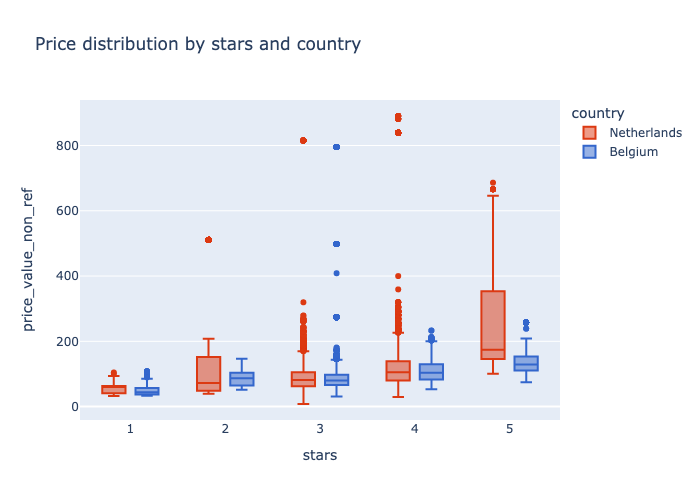

In [46]:
fig = px.box(hotels_df_with_pricing, x='stars', y='price_value_non_ref', color='country', color_discrete_map=c, height=500, title='Price distribution by stars and country')
fig.show()

Surprisingly, the most expensive outliers belong to the 3- and 4-star hotels instead of 5-star ones. Otherwise, the prices between Belgium and The Netherlands are similarly distributed by number of stars. Except when it comes to 5-star hotels, for which the prices in the Netherlands are much higher. However, we need to remember that we only have 7 5-star hotels in Belgium and 16 in The Netherlands. Unless these are the only 5-star hotels in these countries, the prices are not representative.
Same for 1- and 2-star hotels -- we only have a handful of each of each country.

Now let's look at the median price for each date. We could also use lead time for this, but it's easier to make conclusions about prices looking at the dates. 

We'll start with The Netherlands.

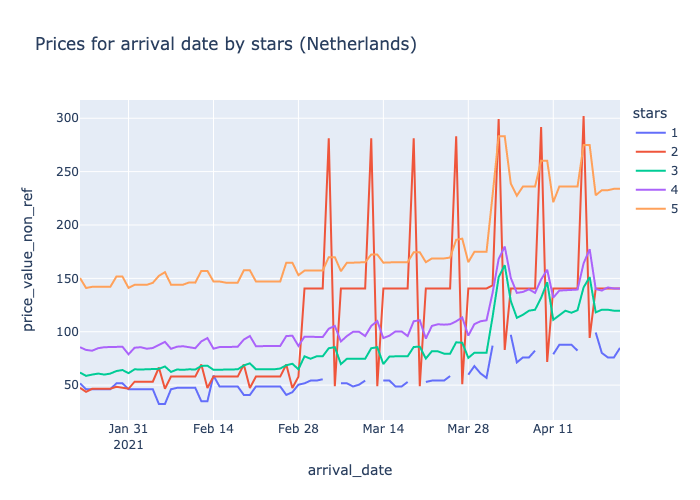

In [47]:
hotels_df_with_pricing_netherlands = hotels_df_with_pricing[hotels_df_with_pricing['country'] == 'Netherlands']

hotels_df_with_pricing_grouped = hotels_df_with_pricing_netherlands.groupby(['stars', 'arrival_date']).agg({'price_value_non_ref': 'median'}).reset_index()
fig = px.line(hotels_df_with_pricing_grouped, x='arrival_date', y='price_value_non_ref', color='stars', height=500, title='Prices for arrival date by stars (Netherlands)')
fig.show()


The general pattern we can see is that the further the arrival date the higher the price gets, for all hotels, no matter the number of stars. Which can be explained by seasonality, i.e., spring is probably a more busy time for the hotels in The Netherlands than winter. However, having only these three months of data, we cannot be sure of that. We'd need past pricing data for at least a couple of years to observe the seasonal effects.

The breaks in the line for 1-star hotels are the missing prices due to the hotels being sold out.

The notable spike in April can be probably explained by Easter holidays. The King's Day was April 27th that year, but we only have data until the 22nd.

The regular spikes in prices could be the weekends. Let's check that.

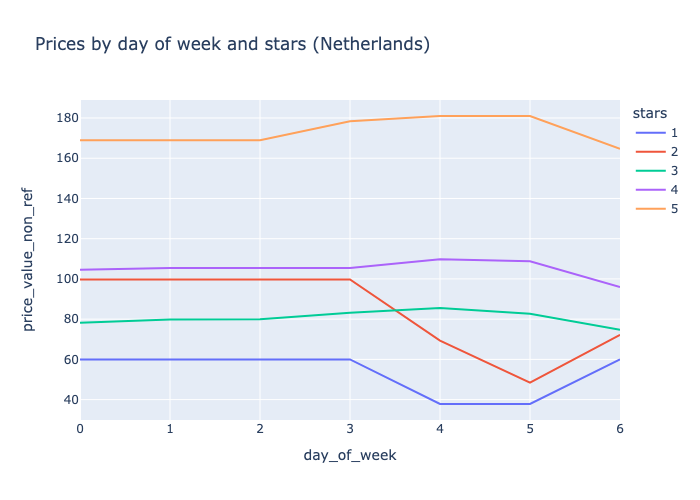

In [48]:
hotels_df_with_pricing_grouped = hotels_df_with_pricing_netherlands.groupby(['stars', 'day_of_week']).agg({'price_value_non_ref': 'median'}).reset_index()
fig = px.line(hotels_df_with_pricing_grouped, x='day_of_week', y='price_value_non_ref', color='stars', height=500, title='Prices by day of week and stars (Netherlands)')
fig.show()


Indeed, it looks like every type of hotel has a pattern of prices between the weekdays/weekends: 1- and 2-stars get cheaper for weekend dates, and 3-, 4- and 5-star hotels get more expensive. 

For the 2-star hotels, rather extreme spikes starting at the beginning of March are interesting. Let's look at them closer. We only have 6 hotels to check so there is a chance that only one hotel is responsible for the spikes.

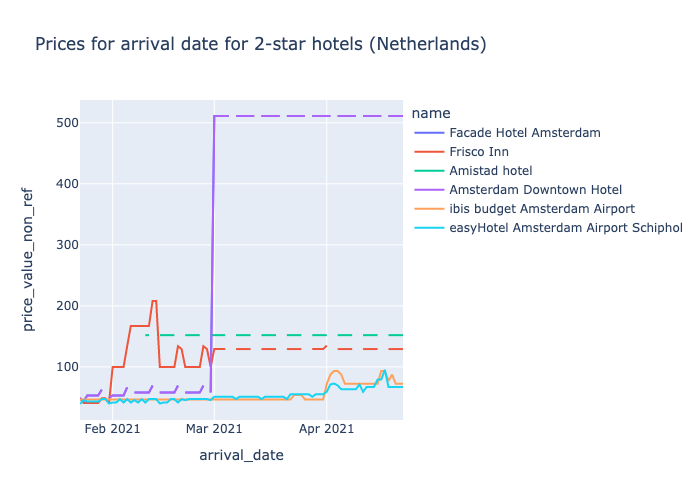

In [49]:
hotels_df_with_pricing_netherlands_2 = hotels_df_with_pricing_netherlands[hotels_df_with_pricing_netherlands['stars'] == 2]

fig = px.line(hotels_df_with_pricing_netherlands_2, x='arrival_date', y='price_value_non_ref', color='name', height=500, title='Prices for arrival date for 2-star hotels (Netherlands)')
fig.show()



And voila, both Amsterdam Downtown Hotel and Facade Hotel Amsterdam (their lines cover each other in the interactive mode) have a very interesting pricing strategy, and the same one at that. They seem to be always sold out on Saturdays (like two other hotels on this chart). But starting from March, the room price skyrockets and stays the same for the rest of the observed period.

It makes sence to take a look at these hotels in particular. There may be a couple of reasons why the price changed so drastically.
1. Maybe the room and service chosen for these hotels are somehow special and can warrant such a price. Maybe two room types were chosen by mistake instead of one?
2. Maybe the high price is a scraping mistake?
3. Maybe the hotels only have a small number of rooms and are sold out every Saturday, so they have only one room left and that's why the price is so unreasonable?

Let's check days of the week first.

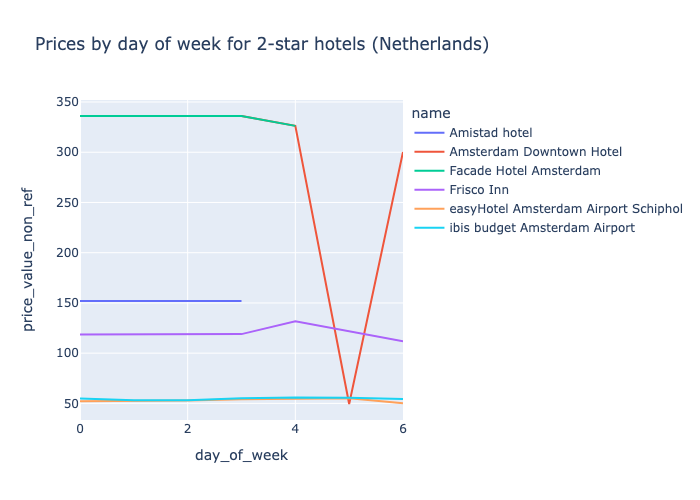

In [50]:
hotels_df_with_pricing_netherlands_2_grouped = hotels_df_with_pricing_netherlands_2.groupby(['day_of_week', 'name']).agg({'price_value_non_ref': 'mean'}).reset_index()
fig = px.line(hotels_df_with_pricing_netherlands_2_grouped, x='day_of_week', y='price_value_non_ref', color='name', height=500, title='Prices by day of week for 2-star hotels (Netherlands)')
fig.show()


After we exclude the other hotels, it looks like Facade is sold out every Staurday and Sunday, while Downtown is not. Let's check.

In [51]:
facade_hotel_pricing = hotels_df_with_pricing[hotels_df_with_pricing['name'] == 'Facade Hotel Amsterdam']
facade_hotel_pricing[facade_hotel_pricing['day_of_week'] == 5]['is_sold_out'].value_counts()

is_sold_out
True    13
Name: count, dtype: int64

In [52]:
facade_hotel_pricing[facade_hotel_pricing['day_of_week'] == 6]['is_sold_out'].value_counts()

is_sold_out
False    13
Name: count, dtype: int64

Facade is sold out only every Saturday.

What about Downtown?

In [53]:
downtown_hotel_pricing = hotels_df_with_pricing[hotels_df_with_pricing['name'] == 'Amsterdam Downtown Hotel']

downtown_hotel_pricing[downtown_hotel_pricing['day_of_week'] == 5]['is_sold_out'].value_counts()

is_sold_out
True     12
False     1
Name: count, dtype: int64

In [54]:
downtown_hotel_pricing[downtown_hotel_pricing['day_of_week'] == 6]['is_sold_out'].value_counts()

is_sold_out
False    13
Name: count, dtype: int64

There is one Saturday when we have pricing for Downtown, that's why there are differences between their weekly lines.


Now let's try to answer our questions.

In [55]:
# 1. room type and sevices
facade_hotel_pricing.groupby(['room_name', 'meal_type_included', 'max_persons']).size()

room_name    meal_type_included  max_persons
Double Room  NONE                2.0            77
dtype: int64

In [56]:
downtown_hotel_pricing.groupby(['room_name', 'meal_type_included', 'max_persons']).size()

room_name    meal_type_included  max_persons
Double Room  NONE                2.0            78
dtype: int64

For both hotels we only have one type of room with no meal for two people. Doesn't seem to warrant such price.

In [57]:
# 2. scraping mistake?
facade_hotel_pricing_before_march = facade_hotel_pricing[facade_hotel_pricing['arrival_date'] < '2021-03-01']
print(f"FACADE Non-refundable mean before March: {facade_hotel_pricing_before_march['price_value_non_ref'].mean()}, Refundable: {facade_hotel_pricing_before_march['price_value_ref'].mean()}")
facade_hotel_pricing_after_march = facade_hotel_pricing[facade_hotel_pricing['arrival_date'] >= '2021-03-01']
print(f"FACADE Non-refundable mean after March: {facade_hotel_pricing_after_march['price_value_non_ref'].mean()}, Refundable: {facade_hotel_pricing_after_march['price_value_ref'].mean()}")


FACADE Non-refundable mean before March: 57.520967741935486, Refundable: 60.54838709677419
FACADE Non-refundable mean after March: 511.0999999999998, Refundable: 538.0


In [58]:
# 2. scraping mistake?
downtown_hotel_pricing_before_march = downtown_hotel_pricing[downtown_hotel_pricing['arrival_date'] < '2021-03-01']
print(f"DOWNTOWN Non-refundable mean before March: {downtown_hotel_pricing_before_march['price_value_non_ref'].mean()}, Refundable: {downtown_hotel_pricing_before_march['price_value_ref'].mean()}")
downtown_hotel_pricing_after_march = downtown_hotel_pricing[downtown_hotel_pricing['arrival_date'] >= '2021-03-01']
print(f"DOWNTOWN Non-refundable mean after March: {downtown_hotel_pricing_after_march['price_value_non_ref'].mean()}, Refundable: {downtown_hotel_pricing_after_march['price_value_ref'].mean()}")


DOWNTOWN Non-refundable mean before March: 57.2671875, Refundable: 60.28125
DOWNTOWN Non-refundable mean after March: 511.0999999999998, Refundable: 538.0


On one hand, the mean before march seems close to the mean after march / 10, so it could be a floating point error.

On the other hand, both refundable and non-refundable prices have changed starting from March. So it is harder to believe in an accident. 

However, for both hotels the means of prices after March are the same, while before March they differ. So it could be another indicator that an error had occurred -- the prices for two different hotels changed to exactly the same numbers.

In [59]:
#3. how many rooms are in the hotel?
facade_hotel_pricing['room_count'].unique()

array([30.])

In [60]:
#3. how many rooms are in the hotel?
downtown_hotel_pricing['room_count'].unique()

array([24.])

The hotels only have 30 and 24 rooms, so it's possible that from March they'd only have one room available, but it still seems unreasonable to hike the price 10x like that. It's hard to say without the occupancy info, which is not available.

Now let's look at pricing patterns in Belgium.

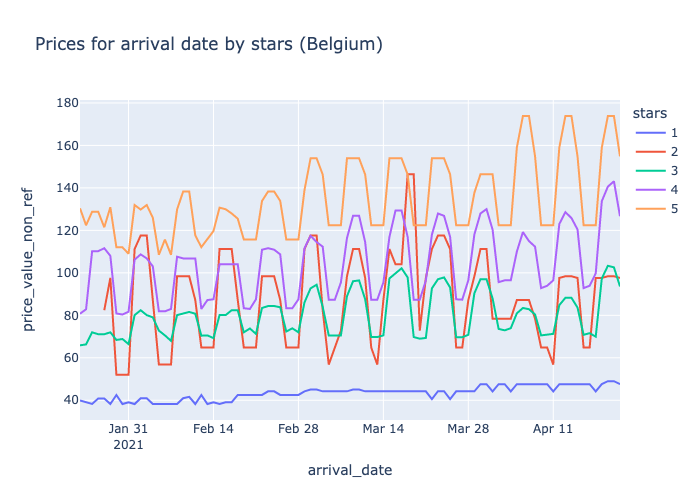

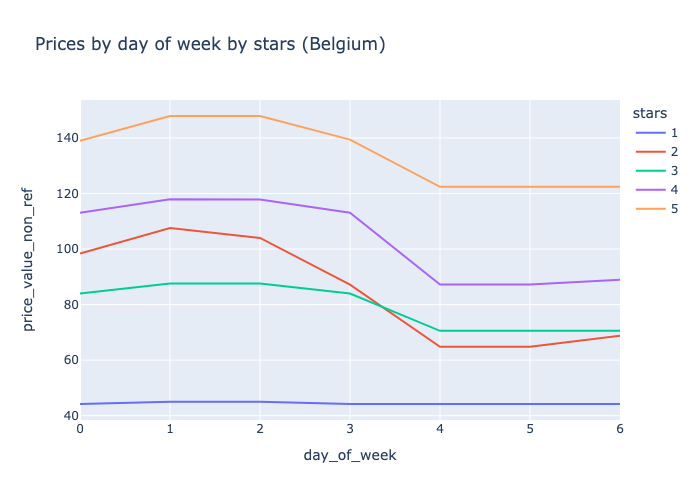

In [61]:
hotels_df_with_pricing_belgium = hotels_df_with_pricing[hotels_df_with_pricing['country'] == 'Belgium']

hotels_df_with_pricing_grouped = hotels_df_with_pricing_belgium.groupby(['stars', 'arrival_date']).agg({'price_value_non_ref': 'median'}).reset_index()
fig = px.line(hotels_df_with_pricing_grouped, x='arrival_date', y='price_value_non_ref', color='stars', height=500, title='Prices for arrival date by stars (Belgium)')
fig.show()

hotels_df_with_pricing_grouped = hotels_df_with_pricing_belgium.groupby(['stars', 'day_of_week']).agg({'price_value_non_ref': 'median'}).reset_index()
fig = px.line(hotels_df_with_pricing_grouped, x='day_of_week', y='price_value_non_ref', color='stars', height=500, title='Prices by day of week by stars (Belgium)')
fig.show()


We can see similar patterns here: the prices grow the futher the arrival dates get, with a spike in the beginning of April (Easter).

Looking at the days of the week, though, unlike in The Netherlands, the prices seem to be higher during weekdays and lower during weekends. Except for 1-star hotels who stay on the same pricing level.

The explanation to this could be the proportion of leasure/business travel in thw two countries. The Netherlands, and Amsterdam in particular, is a big hub for tourists. So is Belgium/Brussels, but the number of business travellers there is probably bigger due to the major international institutions concentrated there.

We only have one 2-star hotel in Belgium so it's hard to make any conclusions as to why its prices are higher than 3-star hotels on weekdays and lower on weekends.

### Other columns?

We're left with 3 other columns - `room_name`, `meal_type_included` and `max_persons`. Let's look at their values.

In [62]:
hotels_df_with_pricing['room_name'].value_counts().sort_values(ascending=False)

room_name
Standard Double or Twin Room         1704
Double Room                          1611
Standard Double Room                 1426
Twin Room                            1137
Small Double Room                    1131
                                     ... 
Double Room with Private Bathroom      52
Twin Room - Non-Smoking                52
Pantone Basic                          51
Standard  Room                         37
Basic Double Room                      22
Name: count, Length: 105, dtype: int64

There are too many types of rooms to perform any meaningful analysis by room. Ideally, we would want at least the room type to be the same in order to compare prices, but we don't have the opportunity.

We could group the room names using some keywords indicating room types ("single", "double", "luxury", etc.), but we don't have enough domain knowledge available to do that. For now we'll leave it alone and move on to the meal type.

In [63]:
hotels_df_with_pricing['meal_type_included'].value_counts(normalize=True).sort_values(ascending=False)

meal_type_included
NONE         0.887986
BREAKFAST    0.112014
Name: proportion, dtype: float64

Most of the values are "NONE", but some rooms have "BREAKFAST" attached to them. Again, ideally we'd want to compare only the rooms with or without breakfast, but due to the variance in room types we won't do that here since it wouldn't add any clarity. 

Lastly, we check the number of people per room.

In [64]:
hotels_df_with_pricing['max_persons'].value_counts(normalize=True).sort_values(ascending=False)

max_persons
2.0    0.996045
3.0    0.003955
Name: proportion, dtype: float64

99% of the rooms are for two people, so at least that is one factor similar between all rooms.

## What else?

There are interesting angles that could be explored, and additional checks that could be done.

1. We could dig deeper into the hotel locations and see the pricing patterns between similar hotels (same size, same number of stars, same locations) -- are their prices also silmilar and follow the same patterns weekly/monthly? For that we'd need to work with distances between hotels, maybe their actual addresses, and define the cirteria for close/similar hotels. We leave that for later exploration.
3. Pricing strategy before and/or after "sold out date": on some charts it seems that prices get higher around the day the hotels are sold out, either before or after or both.
4. Other events: besdes Easter, we didn't notice any significant spikes in prices, not even on February 14th, which was a Sunday. We could look for other important events -- big concerts, summits, conferences around these 90 days and check if there were spikes in prices.
5. As mentioned before, we could try to group the rooms by categories using keywords, in order to provide fair price comparison. Although, it would make sense that such categorization already exists in our full "knowledge base" and is just missing in this sample. Otherwise it would be very hard to conduct any analysis/forecasting. Therefore, we won't bother with it at this point.
6. In this example, we were not manipulating big dataframes or joining many of them. Therefore, we didn't bother to utilize the indices efficiently. 

## Conclusion

This small example showcases that there can be significant differences between two markets, even the ones as seemingly close as Belgium and The Netherlands. It may also point to certain data quality issue, such as missing hotel information and unreasonable outlier prices.